# ch05 회귀 

# P 297

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y=4X+6

X=2* np.random.rand(100,1)
y= 6+4* X+np.random.randn(100,1)

plt.scatter

<function matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)>

In [2]:
# P 298

In [3]:
def get_cost(y,y_pred):
    N=len(y)
    cost=np.sum(np.squre(y-y_pred)) /N
    return cost

In [4]:
def get_weight_updates(w1,w0,X,y,learning_rate = 0.01):
    N=len(y)
    
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    
    y_pred = np.dot(X,w1.T) + w0
    diff = y-y_pred
    
    w0_factors = np.ones((N,1))
    
    w1_update = -(2/N)* learning_rate*(np.dot(X.T , diff))
    w0_update = -(2/N)* learning_rate*(np.dot(w0_factors.T , diff))
    
    return w1_update , w0_update

In [5]:
# P 299

In [6]:
def gradient_descent_steps(X,y,iters=10000):
    
    w0= np.zeros((1,1))
    w1= np.zeros((1,1))
    
    
    
    for ind in range(iters):
        w1_update , w0_update = get_weight_updates(w1,w0,X,y,learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1,w0

In [7]:
def get_cost(y,y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost

w1,w0 = gradient_descent_steps(X,y,iters=1000)
print("w1:{0:.3f} w0:{1:.3f}" .format(w1[0,0], w0[0,0]))
y_pred = w1[0,0]* X+w0
print('Gradient Decent Total Cost: {0:.4f}'.format(get_cost(y,y_pred)))

w1:4.022 w0:6.162
Gradient Decent Total Cost: 0.9935


# P 300

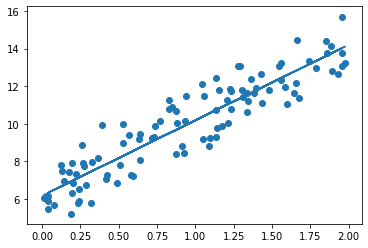

In [8]:
plt.scatter(X,y)
plt.plot(X,y_pred)

In [9]:
def stochastic_gradient_descent_steps(X,y,batch_size=10,iters=1000):
    w0=np.zeros((1,1))
    w1=np.zeros((1,1))
    prev_cost=100000
    iter_index=0
    
    for ind in range(iters):
        np.random.seed(ind)
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        
        w1_update , w0_update = get_weight_updates(w1,w0,X,y,learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
        
    return w1,w0

In [10]:
w1,w0 = gradient_descent_steps(X,y,iters=1000)
print("w1:",round(w1[0,0],  3) , 'w0', round(w0[0,0], 3))

y_pred = w1[0,0]* X+w0
print('Gradient Decent Total Cost: {0:.4f}'.format(get_cost(y,y_pred)))

w1: 4.022 w0 6.162
Gradient Decent Total Cost: 0.9935


In [11]:
# 306 Boston

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from sklearn.datasets import load_boston

In [13]:
boston=load_boston()
bostonDF=pd.DataFrame(boston.data,columns=boston.feature_names)

bostonDF['PRICE']=boston.target
print('Boston 데이터 세트 크기:' , bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


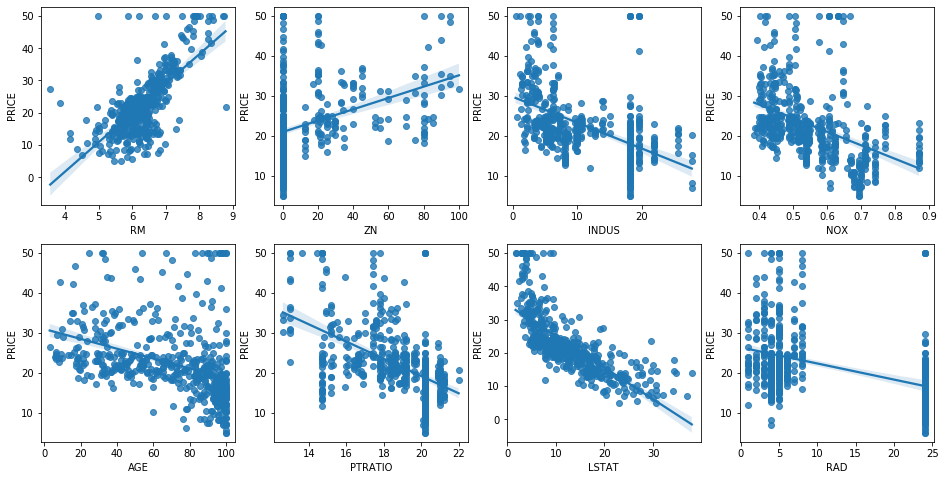

In [14]:
fig,axs = plt.subplots(figsize=(16,8) , ncols=4, nrows=2 )
lm_features = ['RM' , 'ZN' , "INDUS" ,"NOX", "AGE" , "PTRATIO" , "LSTAT" ,"RAD" ]
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    
    sns.regplot(x=feature, y='PRICE' , data=bostonDF , ax=axs[row][col] )

# 단일 변수에 대한 선형 회귀

# RM확인하기 

In [15]:
X= bostonDF['RM']

# X =boston.data[:,5]
y = boston.target

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=19)

In [17]:
from sklearn.linear_model import LinearRegression
sim_lr = LinearRegression()

## 모델 학습하기

In [18]:
import numpy as np
sim_lr.fit(X_train.values.reshape(-1,1) , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# 결과 예측

In [19]:
y_pred = sim_lr.predict(X_test.values.reshape(-1,1))

# 결과 확인하기

In [20]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.4368659674681269

In [21]:
sim_lr.coef_, sim_lr.intercept_

(array([8.9555325]), -34.01581780070619)

In [22]:
# price  = 8.95* RM  - 34

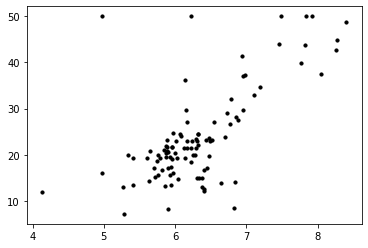

In [23]:
plt.scatter(X_test,y_test,s=10,c='black')
# line_x = np.linspace(np.min(X_test) , np.max(X_test),   10 )
# line_y = sim_lr.predict(line_x)
plt.show()

In [24]:
line_x = np.linspace(np.min(X_test),np.max(X_test),10)
line_y = sim_lr.predict(line_x.reshape(-1,1))

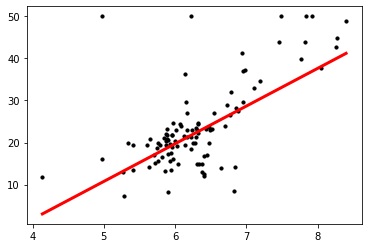

In [25]:
plt.scatter(X_test,y_test,s=10,c='black')
plt.plot(line_x,line_y,c='red',lw=3)
plt.show()

In [26]:
w= sim_lr.coef_[0]
b=sim_lr.intercept_
xs = [4,8]
y1 = 4*w+b
y2= 8*w+b

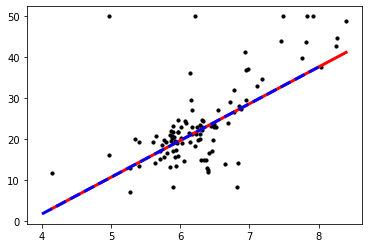

In [27]:
plt.scatter(X_test,y_test,s=10,c='black')
plt.plot(line_x,line_y,c='red',lw=3)
plt.plot(xs,[y1,y2] ,c='blue', lw=3 , ls='--' )
plt.show()

# LSTAT 확인하기

In [28]:
X= bostonDF['LSTAT']

# X =boston.data[:,5]
y = boston.target

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=19)

In [30]:
from sklearn.linear_model import LinearRegression
sim_lr = LinearRegression()

In [31]:
import numpy as np
sim_lr.fit(X_train.values.reshape(-1,1) , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
y_pred = sim_lr.predict(X_test.values.reshape(-1,1))

In [33]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.5197154926220184

In [34]:
sim_lr.coef_, sim_lr.intercept_

(array([-0.8922435]), 33.591648794612624)

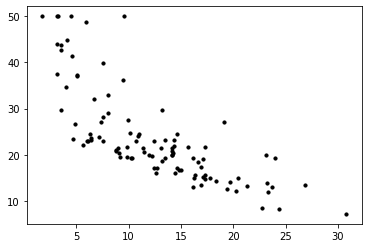

In [35]:
plt.scatter(X_test,y_test,s=10,c='black')
# line_x = np.linspace(np.min(X_test) , np.max(X_test),   10 )
# line_y = sim_lr.predict(line_x)
plt.show()

In [36]:
line_x = np.linspace(np.min(X_test),np.max(X_test),10)
line_y = sim_lr.predict(line_x.reshape(-1,1))

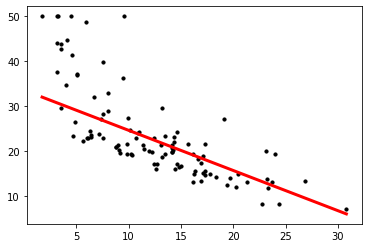

In [37]:
plt.scatter(X_test,y_test,s=10,c='black')
plt.plot(line_x,line_y,c='red',lw=3)
plt.show()

In [38]:
w= sim_lr.coef_[0]
b=sim_lr.intercept_
xs = [4,8]
y1 = 4*w+b
y2= 8*w+b

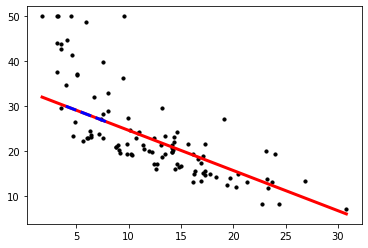

In [39]:
plt.scatter(X_test,y_test,s=10,c='black')
plt.plot(line_x,line_y,c='red',lw=3)
plt.plot(xs,[y1,y2] ,c='blue', lw=3 , ls='--' )
plt.show()

In [40]:
# 나머지 확인하기


In [41]:
names = [i for i in bostonDF.columns[1:9]]
names

['ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD']

In [42]:
from sklearn.metrics import r2_score
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

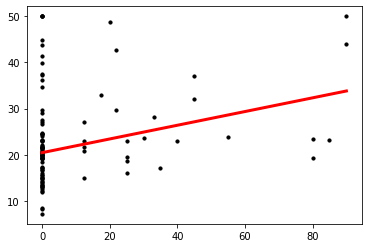

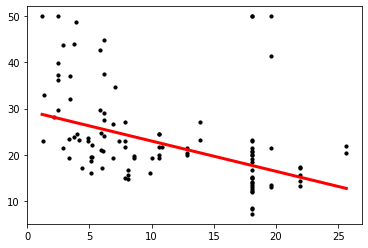

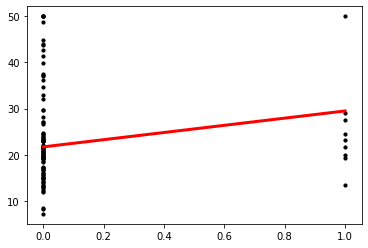

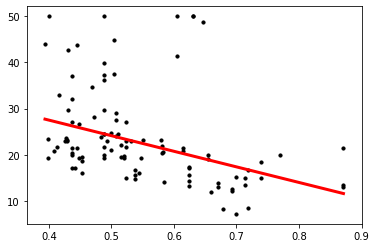

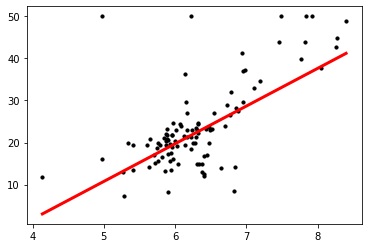

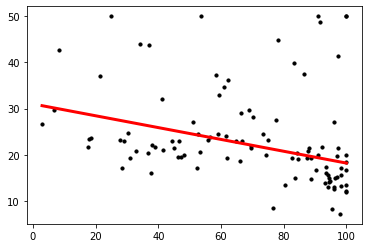

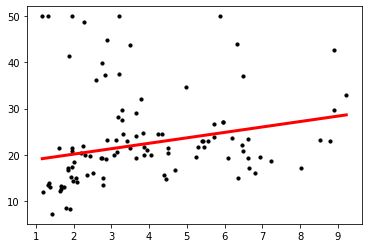

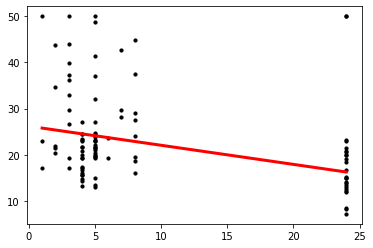

In [71]:
for name in names:    
      
    X= bostonDF[name]
    y = boston.target
    
    X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=19)    

    sim_lr = LinearRegression()

    sim_lr.fit(X_train.values.reshape(-1,1) , y_train)

    y_pred = sim_lr.predict(X_test.values.reshape(-1,1))

    r2_score(y_test,y_pred)

    sim_lr.coef_, sim_lr.intercept_

    plt.scatter(X_test,y_test,s=10,c='black')
    
 #     plt.show()
#     line_x = np.linspace(np.min(X_test) , np.max(X_test),   10 )
#     line_y = sim_lr.predict(line_x)
    line_x = np.linspace(np.min(X_test),np.max(X_test),10)
    line_y = sim_lr.predict(line_x.reshape(-1,1))
#     plt.scatter(X_test,y_test,s=10,c='blue')
    plt.plot(line_x,line_y,c='red',lw=3)
#      plt.show()
    
    for i, feature in enumerate(lm_features):
            row = int(i/4)
            col = i%4
            sns.regplot(x=feature, y='PRICE' , data=bostonDF , ax=axs[row][col] )
    plt.show()
    

In [44]:
line_x = np.linspace(np.min(X_test),np.max(X_test),10)
line_y = sim_lr.predict(line_x.reshape(-1,1))

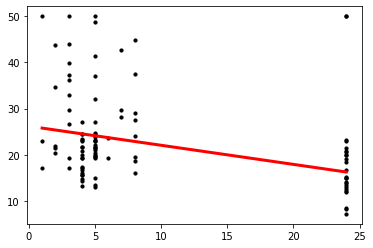

In [72]:
plt.scatter(X_test,y_test,s=10,c='black')
plt.plot(line_x,line_y,c='red',lw=3)
plt.show()

# 의사결정 나무 

In [106]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=5)
dtr.fit(X_train.values.reshape(-1,1) , y_train)
y_pred = dtr.predict(X_test.values.reshape(-1,1))

rmse_dtr = np.round(np.sqrt(mean_squared_error(X_test,y_pred)), 2)

# 서포트 벡터 머신 

In [107]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
svr = SVR()

svr.fit(X_train.values.reshape(-1,1) , y_train)
y_pred = svr.predict(X_test.values.reshape(-1,1))

rmse_svr = np.round(np.sqrt(mean_squared_error(X_test,y_pred)), 2)

# 선형 

In [108]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train.values.reshape(-1,1) , y_train)
y_pred = lr.predict(X_test.values.reshape(-1,1))

rmse_lr = np.round(np.sqrt(mean_squared_error(X_test,y_pred)), 2)

In [109]:
print(rmse_lr , rmse_dtr , rmse_svr)

17.74 18.55 16.48


In [110]:
print(rmse_lr, rmse_dtr , rmse_svr)

17.74 18.55 16.48


In [ ]:
# 여기서 SVR이 성능이 제일 좋다 !~